# mrbles pipeline example

## Load necessary modules

In [1]:
import os
import gc
import importlib
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import mrbles

# For fancy interactive Plotly graphs
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools
from plotly.tools import FigureFactory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # For plotly offline mode
# Set plotly to notebook mode
init_notebook_mode(connected=True)
py.sign_in('bjornharink_stanford', 'VqISgcHFwPkY0z50PG47')

Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


In [2]:
importlib.reload(mrbles)
importlib.reload(mrbles.data)
importlib.reload(mrbles.core)
importlib.reload(mrbles.pipeline)
importlib.reload(mrbles)

Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford
Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


<module 'mrbles' from 'G:\\My Drive\\[Stanford]\\DEV\\Encoded Beads Project\\Bead Analysis\\mrbles\\__init__.py'>

## Load image set

The dictionary keys of image folders and image pattersn must match.
The instatiatiation of the object will search for the files. An error is thrown if no images are found.

In [3]:
# image_folder = r"C:\DATA\Huy"
# image_folders = {"50 nM" : r"C:\DATA\Huy", 
#                  "100 nM" : r"C:\DATA\Huy",
#                  "250 nM" : "C:\DATA\Huy",
#                  "500 nM" : r"C:\DATA\Huy",
#                  "1000 nM" : r"C:\DATA\Huy"
# }
# image_patterns = {"50 nM" : r"20170726_HQN_CN_PxI2_1Step_50nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
#                   "100 nM" : r"20170726_HQN_CN_PxI2_1Step_100nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "250 nM" : "20170726_HQN_CN_PxI2_1Step_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "500 nM" : r"20170726_HQN_CN_PxI2_1Step_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "1000 nM" : r"20170726_HQN_CN_PxI2_1Step_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

In [4]:
# image_folders = {"63 nM" : r"C:\DATA\Huy\20180111 CN", 
#                  "125 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "250 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "500 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "1000 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "2000 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "Biotin" : r"C:\DATA\Huy\20180111 CN"
#                  #"NIR" : r"C:\DATA\Huy\20180111 CN"
# }
# image_patterns = {"63 nM" : r"20180111_CN_Final_Normal_p49_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
#                   "125 nM" : r"20180111_CN_Final_Normal_p49_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "250 nM" : "20180111_CN_Final_Normal_p49_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "500 nM" : r"20180111_CN_Final_Normal_p49_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "1000 nM" : r"20180111_CN_Final_Normal_p49_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "2000 nM" : r"20180111_CN_Final_Normal_p49_2uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
#                   #"NIR" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

In [5]:
image_folders = {"32 nM" : r"C:\DATA\Huy\20180112 CN",
                 "63 nM" : r"C:\DATA\Huy\20180112 CN", 
                 "125 nM" : r"C:\DATA\Huy\20180112 CN",
                 "250 nM" : r"C:\DATA\Huy\20180112 CN",
                 "500 nM" : r"C:\DATA\Huy\20180112 CN",
                 "1000 nM" : r"C:\DATA\Huy\20180112 CN",
                 "2000 nM" : r"C:\DATA\Huy\20180112 CN",
                 "Biotin" : r"C:\DATA\Huy\20180111 CN"
                 #"NIR" : r"C:\DATA\Huy\20180111 CN"
}
image_patterns = {"32 nM" : r"20180111_CN_Final_Super_32nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "63 nM" : r"20180111_CN_Final_Super_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
                  "125 nM" : r"20180111_CN_Final_Super_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "250 nM" : "20180111_CN_Final_Super_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "500 nM" : r"20180111_CN_Final_Super_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "1000 nM" : r"20180111_CN_Final_Super_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "2000 nM" : r"20180111_CN_Final_Super_2uMd_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
                  #"NIR" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
mrbles_images.crop_x = slice(90, 990)
mrbles_images.crop_y = slice(90, 990)

If no error was thrown the images can be loaded into memory.

In [6]:
mrbles_images.load()
mrbles_images.rename_channel('Cy5-E 10%', 'Cy5-E')

In [7]:
mrbles_images['Biotin'].dtype

dtype('uint16')

By calling the object the Xarray content is displayed.

The internal Xarray DataArray can be sliced using Xarray syntax (similar to Pandas).
```python
mrbles_images['set name', file number, 'channel name', y-slice, x-slice]
```

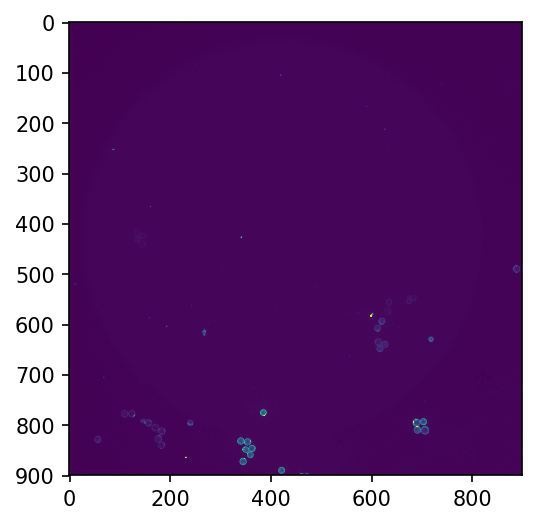

In [8]:
plt.figure(dpi=150)
plt.imshow(mrbles_images['2000 nM', 0, 'Cy5-E']);

## Find MRBLEs in images

Instatiate a MBRLEs finding object, giving initial bead_size (pixels), which must be set. More fine-tune settings can be set by calling object.settings.area_max etc. Otherwise, default settings are used.

In [9]:
find_mrbles = mrbles.Find(bead_size=14, border_clear=True, circle_size=350)
find_mrbles.settings.eccen_max = 0.65
find_mrbles.settings.parallelize = True

In [10]:
find_mrbles.find(mrbles_images[:, : , 'Brightfield'])

Mean bead radius: 14.23
Number of beads in set 32 nM: 1027
Number of beads in set 63 nM: 989
Number of beads in set 125 nM: 875
Number of beads in set 250 nM: 1162
Number of beads in set 500 nM: 876
Number of beads in set 1000 nM: 1058
Number of beads in set 2000 nM: 1351
Number of beads in set Biotin: 3223
Total number of beads: 10561


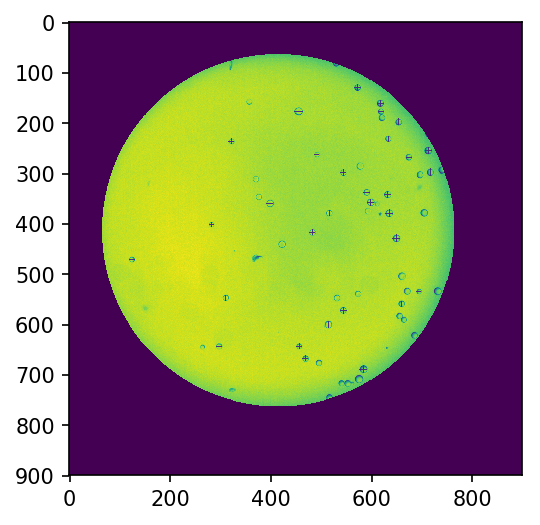

In [11]:
plt.figure(dpi=150)
plt.imshow(find_mrbles['Biotin', 1, 'mask_check'])

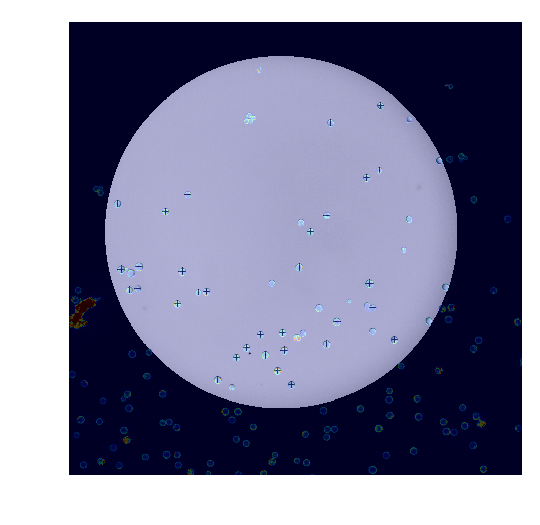

In [12]:
plt.figure(dpi=150)
find_mrbles.settings.show_image_overlay(find_mrbles['Biotin', 20, 'mask_check'], mrbles_images['Biotin', 20, 'Cy5-E'])

## Create Reference spectra

In [13]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": r"C:\DATA\20170406 - Reference files - KARA",
    "Sm": r"C:\DATA\20170406 - Reference files - KARA",
    "Tm": r"C:\DATA\20170406 - Reference files - KARA",
    "Eu": r"C:\DATA\20170406 - Reference files - KARA",
    "bkg": r"C:\DATA\Huy\20180111 CN\20180111_CN_Final_Normal_biotinb_5"
}
REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "20180111_CN_Final_Normal_biotinb_5_MMStack_Pos0.ome.tif"
}

In [14]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS, bead_size=18)
spec_object.crop_x = slice(262, 762)
spec_object.crop_y = slice(262, 762)
spec_object.bkg_roi = [slice(390, 738), slice(377, 733)]

In [15]:
spec_object.load()

Mean bead radius: 15.65
Number of beads in set Dy: 270
Number of beads in set Sm: 506
Number of beads in set Tm: 308
Number of beads in set Eu: 203
Total number of beads: 1287


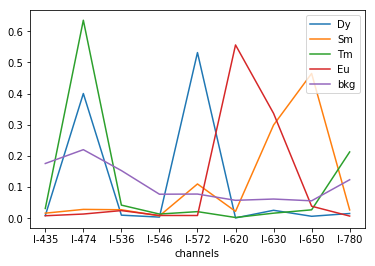

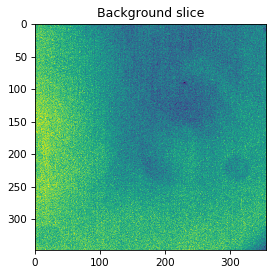

In [16]:
spec_object.plot()

## Spectral unmixing and get ratios

In [17]:
ratio_images = mrbles.Ratio(spec_object)

In [18]:
ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu', combine_data=mrbles_images[:, :, ['Cy5-E']])

c:\python36\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

c:\python36\lib\site-packages\xarray\core\dtypes.py:25: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.

c:\python36\lib\site-packages\xarray\core\dtypes.py:29: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



In [19]:
ratio_images

{'32 nM': <xarray.DataArray (f: 35, c: 9, y: 900, x: 900)>
array([[[[463, ..., 638],
         ...,
         [541, ..., 861]],

        ...,

        [[939.8706219286331, ..., 902.4796219074469],
         ...,
         [790.2678498514944, ..., 1601.1975238996265]]],


       ...,


       [[[468, ..., 569],
         ...,
         [586, ..., 879]],

        ...,

        [[834.1173138619497, ..., 812.9063402350146],
         ...,
         [869.0152969390066, ..., 920.5854875913469]]]], dtype=object)
Coordinates:
  * c        (c) object 'Cy5-E' 'Dy' 'Dy_ratio' 'Eu' 'Sm' 'Sm_ratio' 'Tm' ...
Dimensions without coordinates: f, y, x, '63 nM': <xarray.DataArray (f: 23, c: 9, y: 900, x: 900)>
array([[[[443, ..., 738],
         ...,
         [604, ..., 923]],

        ...,

        [[849.7157922716812, ..., 796.351736298436],
         ...,
         [845.834094068809, ..., 866.9371101276381]]],


       ...,


       [[[523, ..., 676],
         ...,
         [579, ..., 868]],

        ...,

     

## Extract data from each MRBLE

In [20]:
extract_data = mrbles.Extract()

In [21]:
extract_data.get(ratio_images[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5-E']], 
                 find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']])

In [22]:
extract_data.filter(bkg_factor=2.0, ref_factor=2.0, bkg='bkg.mask_full', ref='Eu.mask_inside')

Pre-filter: 10561
Post-filter: 10073
Filtered: 488 (4.6%)


## Decode

In [23]:
# Target file location
# TARGET_FOLDER = r"C:\DATA\CodeSets"
# TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_48Codes.csv")
# TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_96Codes.csv")
#target_load = np.genfromtxt(TARGET_FILE, delimiter=',')
# target = target_load[:, 1:4]  # Target set to Dy, Sm, Tm (no CeTb) Order: [CeTb, Dy, Sm, Tm]

seq_file = pd.read_excel(r'C:\DATA\Huy\20180105_SEQ_CN_Final-Match-List.xlsx')
#seq_file = seq_file[(seq_file.code != 18) & (seq_file.code != 27) & (seq_file.code != 47)]
target = seq_file.loc[:, ['Dy', 'Sm', 'Tm']].values
seq_file.loc[(seq_file.code==12), ('Dy', 'Sm', 'Tm')] = [0, 0.41682, 0.02844]
seq_file.loc[(seq_file.code==13), ('Dy', 'Sm', 'Tm')] = [0, 0.47785, 0.04081]
#target = seq_file.loc[(seq_file.set=='match'), ['Dy', 'Sm', 'Tm']].values
target_biotin = seq_file.loc[:, ['Dy', 'Sm', 'Tm']].values
#sequences = seq_file.loc[(seq_file.set=='match')].reset_index(drop=True)
sequences = seq_file.reset_index(drop=True)
sequences_biotin = seq_file.reset_index(drop=True)

In [27]:
biotin_set = extract_data.data.loc[('Biotin')]

In [26]:
biotin_set

Cy5-E.mask_bkg  Cy5-E.mask_full  Cy5-E.mask_inside  Cy5-E.mask_lbl  \
0  0            405.0          13515.5            13060.0               3   
   1            426.5          14138.5            13222.0               4   
   2            428.0          15621.5            15645.0               5   
   3            449.0          14640.0            13695.5               6   
   4            467.0          15137.5            15306.0              12   
   5            496.5          12286.0            11492.0              13   
   6            469.5          13055.0            12382.5              14   
   7            452.5          13695.0            13099.5              15   
   8            469.0          14515.0            13898.5              16   
   9            364.0          13886.0            14913.0              17   
   10           501.5          13949.0            13178.0              18   
   11           476.0          16933.5            16653.0              19   
   14           461.0          10711.0             9363.0              22   
   15           479.0          14546.0            13555.0              23   
   16           585.0          13560.5            12755.5              25   
   17           440.0          11761.0            11355.0              26   
   18           446.0          14317.0            12472.0              27   
   19           422.0          10658.0            10205.5              28   
   20           422.0          12050.0            10577.0              29   
   21           401.0          12349.0            11665.0              30   
   22           519.0          13598.0            12188.0              31   
   23           486.0          18961.5            15805.0              32   
   24           410.0          13846.0            13612.0              33   
   25           440.0          19393.0            19013.0              34   
   26           378.0          11109.0             9799.0              35   
   27           404.5          11226.0            10658.5              36   
   28           393.5          12653.0            11687.0              37   
   29           397.0          15921.0            14495.0              38   
   31           390.0          18510.0            16927.5              40   
1  0            429.0          10869.0            10449.5               3   
...               ...              ...                ...             ...   
28 0            418.0          12434.5            11331.0               3   
   1            461.0          15217.0            15399.0               4   
   2            464.0          14978.0            13746.0               5   
   3            584.0          10839.0             9971.5               6   
   4            457.0          13609.0            13060.5               7   
   5            369.0           9975.0             9620.0               8   
   6            541.5          13464.0            12241.0               9   
   7            464.0          13064.0            12395.5              11   
   8           1419.0          11901.0            10054.0              12   
   9            595.5          11570.0            10681.0              13   
   10           508.5           9495.5             8745.0              14   
   11           374.0           9383.5             9095.0              15   
   12          7682.5           9903.0             9670.0              16   
   13           571.5          11014.0             9604.0              19   
   14           576.0          11869.5            11317.5              20   
   15           483.0          15193.0            13782.5              21   
   16           467.0          14133.0            13723.0              22   
   17           431.0           9083.5             8560.0              23   
   18           439.5          13279.0            12921.0              24   
   20           404.0           8970.0             8573.0              27   
   

In [28]:
mrbles_decode_biotin = mrbles.Decode(target_biotin)

In [30]:
mrbles_decode_biotin.decode(biotin_set.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine_data=biotin_set)

Delta:  0.12356326991415723
Delta:  0.049789483620428225
Delta:  0.06951031402800094
Delta:  0.06467380435983448
Delta:  0.03608193046628739
Delta:  0.007843266915780769
Delta:  0.0003378612655815647
Delta:  0.0
Converged after: 8
Number of unique codes found: 48
Missing codes: None
Silhouette Coefficient: 0.7400501672321559
AIC: 255488.6816741301
BIC: 258376.93600542124


In [31]:
extract_set_biotin = mrbles_decode_biotin.data.loc[(mrbles_decode_biotin.data.confidence > 0.95), ('code', 'flag', 'Cy5-E.mask_ring')]
extract_set_biotin.loc[:, 'Cy5-E.mask_ring'] -= mrbles_decode_biotin.data.loc[:, ('Cy5-E.mask_bkg')]

In [32]:
mrbles_biotin = mrbles.Analyze(seq_list=sequences_biotin)

In [34]:
mrbles_biotin.analyze(extract_set_biotin)

c:\python36\lib\site-packages\scipy\stats\stats.py:998: RuntimeWarning:

invalid value encountered in double_scalars



In [35]:
mrbles_biotin.data

,mean,median,sd,se,N,CV,set.sequence,set.code
code,,,,,,,,
0,19337.281250,18619.25,3881.472369,489.019553,64,0.200725,AGIVPIHVTHAPGEE,1
1,18457.402597,17839.50,3346.135490,383.828064,77,0.181290,HPVIVITGPHEE,2
2,17878.970930,17313.00,3536.195179,383.554220,86,0.197785,HPRIVITGPHEE,3
3,24444.919355,23085.00,5011.820189,522.518375,93,0.205025,HPLIVITGPHEE,4
4,16408.439394,16389.50,3015.209864,304.582192,99,0.183760,HPVIVIEGPHEE,5
5,18691.235714,19008.00,2642.011371,318.060793,70,0.141350,HPVIVLTGPHEE,6
6,18002.700000,17643.00,5353.990898,622.388800,75,0.297399,IPVIVITGPHEE,7
7,16299.407895,15968.50,3279.669188,378.703578,76,0.201214,HPVIVITGLHEE,8
8,16600.887097,16345.75,3250.327658,416.161812,62,0.195792,HPVIVITMPHEE,9


# Concentrations

In [44]:
mrbles_decode = mrbles.Decode(target)

In [45]:
mrbles_decode.settings.icp._train = True

In [46]:
bead_set = extract_data.data.loc[(['32 nM', '63 nM', '125 nM','250 nM','500 nM', '1000 nM','2000 nM'])]

In [47]:
mrbles_decode.decode(bead_set.loc[:'1000 nM', ('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine_data=bead_set)

Delta:  0.128463097302364
Delta:  0.06676047269383191
Delta:  0.07524307620343977
Delta:  0.0463589599714787
Delta:  0.02307884496988416
Delta:  0.006079010486732941
Delta:  0.0012512073406854406
Delta:  0.00036578719803542027
Delta:  5.922693463402381e-05
Converged after: 9
Number of unique codes found: 48
Missing codes: None
Silhouette Coefficient: 0.7312828342573527
AIC: 446878.37161369773
BIC: 450064.46370153315


In [48]:
mrbles_decode.decode(bead_set.loc[:, ('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine_data=bead_set)

G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis\mrbles\core.py:1105: UserWarning:

Training mode: ON

G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis\mrbles\core.py:1109: UserWarning:

Training mode: ON



Delta:  0.0015707475784588762
Delta:  0.00015688135209320698
Delta:  0.0
Converged after: 3
Number of unique codes found: 48
Missing codes: None
Silhouette Coefficient: 0.7325410088071724
AIC: 552462.3188862491
BIC: 555745.3614638746


In [49]:
mrbles_final = mrbles.Analyze(seq_list=sequences)

In [50]:
extract_set = mrbles_decode.data.loc[(mrbles_decode.data.confidence > 0.95), ('code', 'flag', 'Cy5-E.mask_ring')]
extract_set.loc[:, 'Cy5-E.mask_ring'] -= mrbles_decode.data.loc[:, ('Cy5-E.mask_bkg')]

In [55]:
mrbles_final.analyze(extract_set)

c:\python36\lib\site-packages\scipy\stats\stats.py:998: RuntimeWarning:

invalid value encountered in double_scalars

c:\python36\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\python36\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars



In [56]:
mrbles_final.data

mean    median            sd           se   N        CV  \
set     code                                                                    
32 nM   0       -88.782609    -91.00     21.473860     4.578242  23 -0.241870   
        1       -49.839286    -48.00     33.070016     6.364328  28 -0.663533   
        2        36.384615     42.00     41.230662    11.902267  13  1.133189   
        3       -21.487179    -25.00     27.750372     4.501705  39 -1.291485   
        4       -84.400000    -85.00     15.180909     3.098790  25 -0.179869   
        5       -41.800000    -45.00     24.249433     5.563201  20 -0.580130   
        6        70.764706     72.00     48.742456    12.185614  17  0.688796   
        7       -75.547619    -73.50     24.088579     3.762004  42 -0.318853   
        8       -79.454545    -81.00     21.584353     6.825572  11 -0.271657   
        9       -62.318182    -51.50     30.140785     9.531353  11 -0.483660   
        10      -31.282051    -33.00     23.489986     3.810579  39 -0.750909   
        11      -79.750000    -79.00     23.264332     7.014460  12 -0.291716   
        13      137.785714    132.00     69.309790    19.223077  14  0.503026   
        14      -23.700000    -24.00     20.765597     6.921866  10 -0.876186   
        15      -19.928571    -21.50     18.260865     7.454967   7 -0.916316   
        16      -39.000000    -38.00     27.320845    11.153688   7 -0.700534   
        17      -12.200000    -15.00     29.947343     5.561082  30 -2.454700   
        18      -23.791667    -26.25     25.491386     7.685942  12 -1.071442   
        19       10.290909      0.00     44.375432     6.038731  55  4.312100   
        20      -45.236842    -47.00     32.276506     7.607645  19 -0.713500   
        21     1540.090909   1497.50    640.328034   202.489504  11  0.415773   
        22     5442.444444   4589.25   3368.940445   817.088076  18  0.619012   
        23     3267.000000   3073.00   2148.230202   620.140643  13  0.657554   
        24     5489.405405   5145.00   2462.280405   410.380068  37  0.448551   
        25     7014.458333   6660.75   2194.294253   370.903425  36  0.312824   
        26     4291.000000   3973.00    422.693658   172.563963   7  0.098507   
        27        4.166667     -6.75     34.834529     8.448614  18  8.360287   
        28      -43.500000    -44.50     42.275880    24.407990   4 -0.971859   
        29      -54.125000    -57.75     16.592073     9.579438   4 -0.306551   
        30      -30.916667    -33.00     31.743750     4.957541  42 -1.026752   
...                    ...       ...           ...          ...  ..       ...   
2000 nM 17     6759.916667   7251.25   1699.146642   412.103593  18  0.251356   
        18     2798.136364   3165.00   1743.199672   380.397355  22  0.622986   
        19     5888.144737   5781.75   1484.187727   243.998959  38  0.252064   
        20     5468.500000   5728.50   1847.644104   435.493892  19  0.337870   
        21    25209.500000  23092.75   6979.680278  1935.815010  14  0.276867   
        22    41222.029412  43680.75  10085.356553  1755.635228  34  0.244659   
        23    26423.888889  28173.00   9970.459640  3525.089811   9  0.377327   
        24    31667.775000  30624.75   8084.138734  1294.498211  40  0.255280   
        25    35691.239130  36068.75   9294.940961  1385.607989  46  0.260426   
        26    22140.150000  23098.25   4785.799960  1595.266653  10  0.216159   
        27     1545.944444   1892.00    765.846788   270.767729   9  0.495391   
        28      294.000000    237.00    112.860533    56.430267   5  0.383879   
        29     2915.750000   2915.75   1033.250000  1033.250000   2  0.354369   
        30      957.388889    947.50    288.572680    56.593759  27  0.301416   
        31    13609.276316  12326.00   4442.516261   730.345174  38  0.326433   
        32     5282.946429   5158.25   2146.571475   413.107873  28  0.406321   
        33     3038.964286   2983.25   1036.390758   

In [58]:
norm_data = mrbles_biotin.data
norm_max = norm_data['mean'].max()

In [59]:
norm_data['mean_scaled'] = mrbles_biotin.data['mean'] / norm_data['mean'].max()
norm_data['median_scaled'] = mrbles_biotin.data['median'] / norm_data['median'].max()
norm_data['sd_scaled'] = mrbles_biotin.data['sd'] / norm_data['mean'].max()
norm_data['se_scaled'] = mrbles_biotin.data['sd_scaled'] / np.sqrt(norm_data['N'])

In [60]:
norm_data

,mean,median,sd,se,N,CV,set.sequence,set.code,mean_scaled,median_scaled,sd_scaled,se_scaled
code,,,,,,,,,,,,
0,19337.281250,18619.25,3881.472369,489.019553,64,0.200725,AGIVPIHVTHAPGEE,1,0.564159,0.617298,0.113241,0.014155
1,18457.402597,17839.50,3346.135490,383.828064,77,0.181290,HPVIVITGPHEE,2,0.538489,0.591446,0.097622,0.011125
2,17878.970930,17313.00,3536.195179,383.554220,86,0.197785,HPRIVITGPHEE,3,0.521613,0.573991,0.103167,0.011125
3,24444.919355,23085.00,5011.820189,522.518375,93,0.205025,HPLIVITGPHEE,4,0.713173,0.765354,0.146218,0.015162
4,16408.439394,16389.50,3015.209864,304.582192,99,0.183760,HPVIVIEGPHEE,5,0.478711,0.543373,0.087968,0.008841
5,18691.235714,19008.00,2642.011371,318.060793,70,0.141350,HPVIVLTGPHEE,6,0.545311,0.630186,0.077080,0.009213
6,18002.700000,17643.00,5353.990898,622.388800,75,0.297399,IPVIVITGPHEE,7,0.525223,0.584932,0.156201,0.018037
7,16299.407895,15968.50,3279.669188,378.703578,76,0.201214,HPVIVITGLHEE,8,0.475530,0.529416,0.095683,0.010976
8,16600.887097,16345.75,3250.327658,416.161812,62,0.195792,HPVIVITMPHEE,9,0.484326,0.541923,0.094827,0.012043


In [61]:
beads_data = mrbles_final.data

In [62]:
beads_data

mean    median            sd           se   N        CV  \
set     code                                                                    
32 nM   0       -88.782609    -91.00     21.473860     4.578242  23 -0.241870   
        1       -49.839286    -48.00     33.070016     6.364328  28 -0.663533   
        2        36.384615     42.00     41.230662    11.902267  13  1.133189   
        3       -21.487179    -25.00     27.750372     4.501705  39 -1.291485   
        4       -84.400000    -85.00     15.180909     3.098790  25 -0.179869   
        5       -41.800000    -45.00     24.249433     5.563201  20 -0.580130   
        6        70.764706     72.00     48.742456    12.185614  17  0.688796   
        7       -75.547619    -73.50     24.088579     3.762004  42 -0.318853   
        8       -79.454545    -81.00     21.584353     6.825572  11 -0.271657   
        9       -62.318182    -51.50     30.140785     9.531353  11 -0.483660   
        10      -31.282051    -33.00     23.489986     3.810579  39 -0.750909   
        11      -79.750000    -79.00     23.264332     7.014460  12 -0.291716   
        13      137.785714    132.00     69.309790    19.223077  14  0.503026   
        14      -23.700000    -24.00     20.765597     6.921866  10 -0.876186   
        15      -19.928571    -21.50     18.260865     7.454967   7 -0.916316   
        16      -39.000000    -38.00     27.320845    11.153688   7 -0.700534   
        17      -12.200000    -15.00     29.947343     5.561082  30 -2.454700   
        18      -23.791667    -26.25     25.491386     7.685942  12 -1.071442   
        19       10.290909      0.00     44.375432     6.038731  55  4.312100   
        20      -45.236842    -47.00     32.276506     7.607645  19 -0.713500   
        21     1540.090909   1497.50    640.328034   202.489504  11  0.415773   
        22     5442.444444   4589.25   3368.940445   817.088076  18  0.619012   
        23     3267.000000   3073.00   2148.230202   620.140643  13  0.657554   
        24     5489.405405   5145.00   2462.280405   410.380068  37  0.448551   
        25     7014.458333   6660.75   2194.294253   370.903425  36  0.312824   
        26     4291.000000   3973.00    422.693658   172.563963   7  0.098507   
        27        4.166667     -6.75     34.834529     8.448614  18  8.360287   
        28      -43.500000    -44.50     42.275880    24.407990   4 -0.971859   
        29      -54.125000    -57.75     16.592073     9.579438   4 -0.306551   
        30      -30.916667    -33.00     31.743750     4.957541  42 -1.026752   
...                    ...       ...           ...          ...  ..       ...   
2000 nM 17     6759.916667   7251.25   1699.146642   412.103593  18  0.251356   
        18     2798.136364   3165.00   1743.199672   380.397355  22  0.622986   
        19     5888.144737   5781.75   1484.187727   243.998959  38  0.252064   
        20     5468.500000   5728.50   1847.644104   435.493892  19  0.337870   
        21    25209.500000  23092.75   6979.680278  1935.815010  14  0.276867   
        22    41222.029412  43680.75  10085.356553  1755.635228  34  0.244659   
        23    26423.888889  28173.00   9970.459640  3525.089811   9  0.377327   
        24    31667.775000  30624.75   8084.138734  1294.498211  40  0.255280   
        25    35691.239130  36068.75   9294.940961  1385.607989  46  0.260426   
        26    22140.150000  23098.25   4785.799960  1595.266653  10  0.216159   
        27     1545.944444   1892.00    765.846788   270.767729   9  0.495391   
        28      294.000000    237.00    112.860533    56.430267   5  0.383879   
        29     2915.750000   2915.75   1033.250000  1033.250000   2  0.354369   
        30      957.388889    947.50    288.572680    56.593759  27  0.301416   
        31    13609.276316  12326.00   4442.516261   730.345174  38  0.326433   
        32     5282.946429   5158.25   2146.571475   413.107873  28  0.406321   
        33     3038.964286   2983.25   1036.390758   

In [63]:
set_codes = np.unique(beads_data['set.code'])

In [64]:
norm_data.loc[norm_data['set.code'] == 20, 'mean_scaled'].values

array([0.52286439])

In [65]:
for code in set_codes:
    norm_mean = norm_data.loc[norm_data['set.code'] == code, 'mean_scaled'].values
    norm_sd = norm_data.loc[norm_data['set.code'] == code, 'sd_scaled'].values
    
    data_mean = beads_data.loc[beads_data['set.code'] == code, 'mean'].values
    data_median = beads_data.loc[beads_data['set.code'] == code, 'median'].values
    data_sd = beads_data.loc[beads_data['set.code'] == code, 'sd'].values
    data_n = beads_data.loc[beads_data['set.code'] == code, 'N'].values
    
    mean_norm = (data_mean / norm_mean)
    median_norm = (data_median / norm_mean)
    sd_norm = np.abs(mean_norm) * (np.sqrt((data_sd / data_mean) ** 2 + (norm_sd / norm_mean)**2))
    cv_norm = mean_norm / sd_norm
    se_norm = sd_norm / np.sqrt(data_n)
    
    beads_data.loc[beads_data['set.code'] == code, 'mean_norm'] = mean_norm
    beads_data.loc[beads_data['set.code'] == code, 'median_norm'] = median_norm
    beads_data.loc[beads_data['set.code'] == code, 'sd_norm'] = sd_norm
    beads_data.loc[beads_data['set.code'] == code, 'cv_norm'] = cv_norm
    beads_data.loc[beads_data['set.code'] == code, 'se_norm'] = se_norm

In [66]:
beads_data

mean    median            sd           se   N        CV  \
set     code                                                                    
32 nM   0       -88.782609    -91.00     21.473860     4.578242  23 -0.241870   
        1       -49.839286    -48.00     33.070016     6.364328  28 -0.663533   
        2        36.384615     42.00     41.230662    11.902267  13  1.133189   
        3       -21.487179    -25.00     27.750372     4.501705  39 -1.291485   
        4       -84.400000    -85.00     15.180909     3.098790  25 -0.179869   
        5       -41.800000    -45.00     24.249433     5.563201  20 -0.580130   
        6        70.764706     72.00     48.742456    12.185614  17  0.688796   
        7       -75.547619    -73.50     24.088579     3.762004  42 -0.318853   
        8       -79.454545    -81.00     21.584353     6.825572  11 -0.271657   
        9       -62.318182    -51.50     30.140785     9.531353  11 -0.483660   
        10      -31.282051    -33.00     23.489986     3.810579  39 -0.750909   
        11      -79.750000    -79.00     23.264332     7.014460  12 -0.291716   
        13      137.785714    132.00     69.309790    19.223077  14  0.503026   
        14      -23.700000    -24.00     20.765597     6.921866  10 -0.876186   
        15      -19.928571    -21.50     18.260865     7.454967   7 -0.916316   
        16      -39.000000    -38.00     27.320845    11.153688   7 -0.700534   
        17      -12.200000    -15.00     29.947343     5.561082  30 -2.454700   
        18      -23.791667    -26.25     25.491386     7.685942  12 -1.071442   
        19       10.290909      0.00     44.375432     6.038731  55  4.312100   
        20      -45.236842    -47.00     32.276506     7.607645  19 -0.713500   
        21     1540.090909   1497.50    640.328034   202.489504  11  0.415773   
        22     5442.444444   4589.25   3368.940445   817.088076  18  0.619012   
        23     3267.000000   3073.00   2148.230202   620.140643  13  0.657554   
        24     5489.405405   5145.00   2462.280405   410.380068  37  0.448551   
        25     7014.458333   6660.75   2194.294253   370.903425  36  0.312824   
        26     4291.000000   3973.00    422.693658   172.563963   7  0.098507   
        27        4.166667     -6.75     34.834529     8.448614  18  8.360287   
        28      -43.500000    -44.50     42.275880    24.407990   4 -0.971859   
        29      -54.125000    -57.75     16.592073     9.579438   4 -0.306551   
        30      -30.916667    -33.00     31.743750     4.957541  42 -1.026752   
...                    ...       ...           ...          ...  ..       ...   
2000 nM 17     6759.916667   7251.25   1699.146642   412.103593  18  0.251356   
        18     2798.136364   3165.00   1743.199672   380.397355  22  0.622986   
        19     5888.144737   5781.75   1484.187727   243.998959  38  0.252064   
        20     5468.500000   5728.50   1847.644104   435.493892  19  0.337870   
        21    25209.500000  23092.75   6979.680278  1935.815010  14  0.276867   
        22    41222.029412  43680.75  10085.356553  1755.635228  34  0.244659   
        23    26423.888889  28173.00   9970.459640  3525.089811   9  0.377327   
        24    31667.775000  30624.75   8084.138734  1294.498211  40  0.255280   
        25    35691.239130  36068.75   9294.940961  1385.607989  46  0.260426   
        26    22140.150000  23098.25   4785.799960  1595.266653  10  0.216159   
        27     1545.944444   1892.00    765.846788   270.767729   9  0.495391   
        28      294.000000    237.00    112.860533    56.430267   5  0.383879   
        29     2915.750000   2915.75   1033.250000  1033.250000   2  0.354369   
        30      957.388889    947.50    288.572680    56.593759  27  0.301416   
        31    13609.276316  12326.00   4442.516261   730.345174  38  0.326433   
        32     5282.946429   5158.25   2146.571475   413.107873  28  0.406321   
        33     3038.964286   2983.25   1036.390758   

In [52]:
sequences

,code,sequence,repeat,set,info,Dy,Sm,Tm
0,1,AGIVPIHVTHAPGEE,NaN,match,Scramble,0.00000,0.00000,0.00000
1,2,HPVIVITGPHEE,NaN,match,PVIVIT-WT,0.00000,0.00000,0.08449
2,3,HPRIVITGPHEE,NaN,match,PVIVIT-Core,0.00000,0.00000,0.28960
3,4,HPLIVITGPHEE,NaN,match,PVIVIT-Core,0.00000,0.00000,0.78752
4,5,HPVIVIEGPHEE,NaN,match,PVIVIT-Core,0.00000,0.10822,0.00000
5,6,HPVIVLTGPHEE,NaN,match,PVIVIT-Core,0.00000,0.10822,0.08449
6,7,IPVIVITGPHEE,NaN,match,PVIVIT-Flank,0.00000,0.10822,0.28960
7,8,HPVIVITGLHEE,NaN,match,PVIVIT-Flank,0.00000,0.10822,0.78752
8,9,HPVIVITMPHEE,NaN,match,PVIVIT-Flank,0.00000,0.25050,0.00000
9,10,HPKIVITGPHEE,NaN,match,PKIVIT-Core,0.00000,0.25050,0.08449


In [ ]:
# beads_data.to_csv(r'D:\20180123_CN_Final_Full-set.csv')

In [ ]:
bead_set1 = mrbles_decode.data

confidence = 0.95

colors = np.multiply(bead_set1[(bead_set1.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set1.loc[(bead_set1.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=bead_set1.loc[(bead_set1.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=bead_set1.loc[(bead_set1.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=bead_set1.loc[(bead_set1.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target[:,0],
    y=target[:,1],
    z=target[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode.settings.gmm.means[:,0],
    y=mrbles_decode.settings.gmm.means[:,1],
    z=mrbles_decode.settings.gmm.means[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios, target_ratios, mean_ratios]
layout = go.Layout(
    showlegend=True,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
bead_set = mrbles_decode_biotin.data

confidence = 0.95

colors = np.multiply(bead_set[(bead_set.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target_biotin)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set.loc[(bead_set.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=bead_set.loc[(bead_set.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=bead_set.loc[(bead_set.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=bead_set.loc[(bead_set.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target_biotin[:,0],
    y=target_biotin[:,1],
    z=target_biotin[:,2],
    text=list(range(1, len(target_biotin)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode_biotin.settings.gmm.means[:,0],
    y=mrbles_decode_biotin.settings.gmm.means[:,1],
    z=mrbles_decode_biotin.settings.gmm.means[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios, target_ratios, mean_ratios]
layout = go.Layout(
    showlegend=True,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)